Code for examining how HMM performs under repeated recalibration


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import sys, glob
[sys.path.append(f) for f in glob.glob('../utils/*')]
from plotting_utils import figSize
from hmm import HMMRecalibration
import hmm_utils
from RTI_utils import RTI
import simulation_utils 
from simulation import simulateBCIFitts

# for a reproducible result
np.random.seed(1)

fig_path = '/home/users/ghwilson/projects/nonstationarities/figures/'
data_dir = '/oak/stanford/groups/shenoy/ghwilson/nonstationarities/simulator/efficiency/'

In [8]:
labels = ['supervised', 'HMM', 'Click HMM', 'RTI']

dicts = list()

for file in glob.glob(data_dir + '/*'):
    file_dict = np.load(file, allow_pickle = True)[0]
    
    for i, label in enumerate(labels):
        d = dict()
        d['ttt']    = file_dict['scores'][-1, i] 
        d['method'] = label
        d['Training time (sec)'] = file_dict['nSimSteps'] * 0.02

        dicts.append(d)
        
df = pd.DataFrame(dicts)

## Vanilla HMM vs RTI comparisons

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

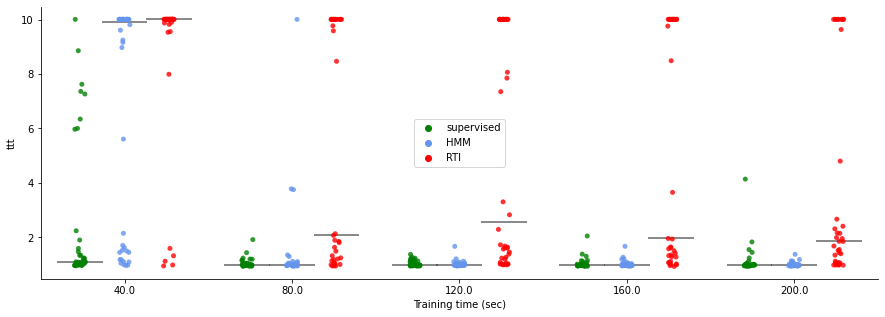

In [31]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'RTI']
colors = ['g', 'cornflowerblue', 'r']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'Training time (sec)', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="Training time (sec)", y="ttt", hue='method', data=scores_df,
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3],labels[3:], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig(fig_path + 'simulator/HMM_vs_RTI_efficiency', format = 'pdf')
plt.show()

In [23]:
import scipy.stats

for nSteps in sorted(np.unique(df['Training time (sec)'])):
    subset = scores_df[scores_df['Training time (sec)'] == nSteps]
    
    print(' \n', 'Time (sec): ', nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.ranksums(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  RanksumsResult(statistic=5.14845827885005, pvalue=2.6263618592003904e-07)
RTI vs supervised: p =  RanksumsResult(statistic=6.633504454851977, pvalue=3.278090776182422e-11)
RTI vs HMM: p =  RanksumsResult(statistic=2.142581681641333, pvalue=0.0321467033788501)
 
 Time (sec):  80.0
HMM vs supervised: p =  RanksumsResult(statistic=-0.2594594594594595, pvalue=0.7952807578708059)
RTI vs supervised: p =  RanksumsResult(statistic=5.108108108108108, pvalue=3.2540046598945294e-07)
RTI vs HMM: p =  RanksumsResult(statistic=4.827027027027027, pvalue=1.3858632002771586e-06)
 
 Time (sec):  120.0
HMM vs supervised: p =  RanksumsResult(statistic=0.8677679462179929, pvalue=0.38552138084024845)
RTI vs supervised: p =  RanksumsResult(statistic=6.839263864779954, pvalue=7.960114981849075e-12)
RTI vs HMM: p =  RanksumsResult(statistic=6.79900658892448, pvalue=1.0534300035786373e-11)
 
 Time (sec):  160.0
HMM vs supervised: p =  RanksumsResult(statistic=0.29480

## Click HMM vs HMM comparisons

In [1]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'Click HMM']
colors = ['g', 'cyan', 'orange']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/vanillaHMM_vs_clickHMM_efficiency', format = 'pdf')
plt.show()

NameError: name 'figSize' is not defined

In [7]:
import scipy.stats

for nSteps in [2000, 4000, 6000, 8000, 10000]:
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.ranksums(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  RanksumsResult(statistic=5.14845827885005, pvalue=2.6263618592003904e-07)
Click HMM vs supervised: p =  RanksumsResult(statistic=-0.9795937124831982, pvalue=0.32728670981117236)
Click HMM vs HMM: p =  RanksumsResult(statistic=-4.835346133307476, pvalue=1.3291415163252108e-06)
 
 Time (sec):  80.0
HMM vs supervised: p =  RanksumsResult(statistic=-0.2594594594594595, pvalue=0.7952807578708059)
Click HMM vs supervised: p =  RanksumsResult(statistic=0.7297297297297297, pvalue=0.46555540490342884)
Click HMM vs HMM: p =  RanksumsResult(statistic=1.1189189189189188, pvalue=0.2631747310595707)
 
 Time (sec):  120.0
HMM vs supervised: p =  RanksumsResult(statistic=0.8677679462179929, pvalue=0.38552138084024845)
Click HMM vs supervised: p =  RanksumsResult(statistic=2.0039177314724785, pvalue=0.04507887380807854)
Click HMM vs HMM: p =  RanksumsResult(statistic=1.1808800917605677, pvalue=0.23765036106437054)
 
 Time (sec):  160.0
HMM vs supervised: p =